# Исследование объявлений о продаже квартир

В данном исследовании анализируются данные сервиса Яндекс Недвижимость — точнее, архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах. Цель исследования — подготовить данные, так чтобы на их основе можно было научить модель определять примерную рыночную стоимость объектов недвижимости: она отследит аномалии и мошенническую деятельность. В работе мы установим параметры, которые влияют на цену. 

По каждому объекту недвижимости на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных: например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

### Импорт библиотек

In [1]:
import pandas as pd

import seaborn as sns 

from matplotlib import pyplot as plt

### Загрузка датасета

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t') #сохраняем датасет в переменную df

Для начала посмотрим на общий вид таблицы. Для этого выведем ее первые десять строк.

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info() # теперь смотрим обшую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего в исходном датасете 22 столбца и 23699 строк.

* `total_images`             — количестве фотографий в объявлении;
* `last_price`               — цена на момент снятия объявления;
* `total_area`               — общая площадь недвижимости;
* `first_day_exposition`     — дата публикации;
* `rooms`                    — число комнат;
* `ceiling_height`           — высота потолков;
* `floors_total`             — всего этажей;
* `living_area`              — жилая площадь;
* `floor`                    — этаж;
* `is_apartment`             — указывает, является ли недвижимость апартаментами;
* `studio`                   — указывает, является ли недвижимость студией;
* `open_plan`                — свободная планировка;
* `kitchen_area`             — площадь кухни;
* `balcony`                  — количество балконов;
* `locality_name`            — название населенного пункта;
* `airports_nearest`         — расстояние до ближайшего аэропорта в м;
* `cityCenters_nearest`      — расстояние до центра города в м;
* `parks_around3000`         — число парков в радиусе 3 км;
* `parks_nearest`            — расстояние до ближайшего парка;
* `ponds_around3000`         — число водоемов в радиусе 3 км;
* `ponds_nearest`            — расстояние до ближайшего водоема в м;
* `days_exposition`          — сколько дней было размещено объявление (от публикации до снятия)

Заметим, что в столбцах следующих столбцах есть пропуски: `ceiling_height`, `floor_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`,`ponds_nearest`,`days_expositions`.

In [5]:
df.describe() #используем метод .describe(), чтобы посмотреть агрегированные данные по столбцам

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В некоторых столбцах можно сразу заметить большой разброс данных (например, в `total_area` максимальное значение составляет 900, при среднем значении 60), в других - потенциальные ошибки (максимальная высота потолков в  `ceiling_height` 100 м).

In [6]:
df[df['ceiling_height']==100] # найдем это предложение недвижимости - 
                              # 5 балконов — жалко нет фотографий

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [7]:
df[df['living_area'] > 400] # теперь посмотрим, что за объекты более 400 метров представлены в датасете

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


В датасете есть пентхаус на 25 этаже - кажется, неплохая цена, но до центра далеко.

### Вывод

Данные требуют преобработки перед дальнейшим исследованием. Кроме того, в таблицу потребуется добавить некоторые общепринятые метрики для объектов недвижимости (например, цену за квадратный метр).

## Предобработка данных

### Стиль заголовков

Перед тем как перейти к предобработке данных, приведем заголовки датасета к одному стилю. Это упростит чтение и визуальное восприятие таблицы.

In [8]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                        'parks_around3000':'parks_around_3000',
                        'ponds_around3000':'ponds_around_3000'})

In [9]:
df.columns # проверим изменения названий столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Проверка явных дубликатов

In [10]:
df.duplicated().sum()

0

Явных дубликатов в датасете нет.

### Работа с пропущенными значениями

На этапе обзора данных были замечены пропуски в нескольких столбцах. Проанализируем их и заполним, где это целесообразно.

In [11]:
df.isna().sum()                      # количество пропусков в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [12]:
round(df.isna().mean(), 2) # доля пропусков в столбцах

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height          0.39
floors_total            0.00
living_area             0.08
floor                   0.00
is_apartment            0.88
studio                  0.00
open_plan               0.00
kitchen_area            0.10
balcony                 0.49
locality_name           0.00
airports_nearest        0.23
city_centers_nearest    0.23
parks_around_3000       0.23
parks_nearest           0.66
ponds_around_3000       0.23
ponds_nearest           0.62
days_exposition         0.13
dtype: float64

У большей доли объявлений не указаны расстояния до парков и водоемов. Видно, этому не придают большого значения при продажи. Но у части пропущены и более "практичные" параметры - например, высота потолков.

Первый столбец с пропусками `ceiling_height` хранит информацию о высоте потолков. Взглянем на пропуски в нем.

In [13]:
df[df['ceiling_height'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [14]:
print(sorted(df['ceiling_height'].unique())) # выводим уникальные значения в столбце.
                                             # используем print, чтобы сделать вывод компактным

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

Когда планируешь ремонт и заказываешь мебель каждый сантиметр может быть важен. Поэтому, заменить пропуски медианным значением не получится - оставляем пропуски.

Переходим к пропускам в столбце `floors_total`

In [15]:
df[df['floors_total'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Никаких очевидных закономерностей — разве что пропуски преимущественно идут в паре с пропусками в `ceiling_height` — кажется, объявление о продаже просто заполнял ленивый риелтор. **Оставляем пропуски** и движемся в следующий столбец — `living_area`.

In [16]:
df[df['living_area'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Как и в случае с потолками, заменить пропуски в жилой площади медианным значением не получится, как и взять среднее соотношение жилой площади к общей: каждый объект недвижимости слишком уникален.

`is_apartment` имеет значительное число пропусков. Причиной стала ошибка заполнения - у данных в столбце тип `object`, хотя по содержанию — это булев тип. Заменим пропуски на **False** т. е. подразумеваем, что пропуск означает, что недвижимость не является апартаментами.

In [17]:
df['is_apartment'] = df['is_apartment'].fillna(False) # заменим пропуски на False

In [18]:
df['is_apartment'].value_counts() #проверим замену пропусков

False    23649
True        50
Name: is_apartment, dtype: int64

In [19]:
df['is_apartment'].dtypes       # без пропусков тип данных сменился на bool

dtype('bool')

In [20]:
df[df['kitchen_area'].isna()] # посмотрим на строки с пропусками в столбце kitchen_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,NaN,13,False,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.6,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,False,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,False,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,False,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


На кухне важен каждый сантиметр - поэтому заменить медианным значением пропуски не получится.

А вот пропуски в столбце `balcony`, вероятно, подразумевают отсутствие балкона. В этом случае их можно заменить нулем.

In [21]:
df['balcony'] = df['balcony'].fillna(0)

In [22]:
df.isna().sum() #взглянем на пропуски еще раз

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Можно заметить, что пропуски в столбцах `city_centers_nearest`, `airports_nearest`, `parks_around_3000`, `ponds_around_3000` почти равны. Есть вероятность, что пропуски у одних и тех, же объектов т. к. тот, кто публиковал объявления о продаже этой недвижимости не вносил данную информацию.

In [23]:
# Посмотрим, верно ли наше предположение, что пропуски в столбцах допущены у одних и тех же объектов

df[(df['city_centers_nearest'].isnull())&(df['parks_around_3000'].isnull())&(df['ponds_around_3000'].isnull())] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5518 объектов — действительно, пропуски с расстояниями до географических объектов находятся в одних и тех же строках.

Заполнить пропуски для парков и водоемов вряд ли возможно. А вот для аэропорта, учитывая что в Санкт-Петербурге и ЛО единственный международный аэропорт — Пулково, пропуски можно заменить медианным значением для населенного пункта там, где он указан.

In [24]:
df['locality_name'].unique() # выведем список всех населенных пунктов, в которых расположена недвижимость из датасета

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [25]:
df.pivot_table(index='locality_name', values='airports_nearest', aggfunc=('median')) # теперь посчитаем медианные значения

,airports_nearest
locality_name,
Зеленогорск,72282.0
Колпино,26232.0
Красное Село,25715.5
Кронштадт,67850.0
Ломоносов,48415.5
Павловск,20529.5
Петергоф,39231.0
Пушкин,15766.0
Санкт-Петербург,26757.5


Медианы рассчитаны для значительно меньшего количества населенных пунктов, чем представлены в датасете. Это означает, что для большинства населенных пунктов информация о расстоянии до аэропорта не указано не в одном объявлении. Проверим на примере одного из отсутствующих в сводной таблице поселка.

In [26]:
df[df['locality_name'] == 'городской посёлок Янино-1'] # посмотрим общее количество объявлений

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
158,15,3100000.0,47.30,2017-11-07T00:00:00,2,NaN,5.0,27.5,2,False,...,8.50,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
529,2,5790000.0,78.89,2017-11-26T00:00:00,3,NaN,12.0,44.5,3,False,...,15.00,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,21.0
746,7,2160000.0,36.00,2018-10-25T00:00:00,1,NaN,12.0,16.0,8,False,...,9.30,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
1121,13,3000000.0,50.40,2018-02-07T00:00:00,2,2.55,5.0,30.7,1,False,...,8.70,1.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21766,7,2006000.0,25.00,2018-03-28T00:00:00,1,2.75,12.0,14.7,11,False,...,9.20,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
22921,3,6036000.0,78.89,2018-07-16T00:00:00,3,2.70,12.0,44.6,5,False,...,14.98,2.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,65.0
23258,12,3000000.0,42.50,2018-01-09T00:00:00,1,NaN,12.0,14.7,6,False,...,14.60,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,208.0
23372,13,3600000.0,59.10,2017-11-24T00:00:00,2,2.50,6.0,31.3,4,False,...,13.60,1.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,237.0


In [27]:
# а теперь количество пропусков в столбце с информацией о рассоянии до аэропорта
print(df[df['locality_name'] == 'городской посёлок Янино-1']['airports_nearest'].isna().sum())

61


Для всех объектов (61/61) в городском поселке Янино-1 нет информации о расстоянии. Таким образом заполнить пропуски в столбце `airports_nearest` также не удастся.

Посмотрим, сколько пропусков можно заполнить медианой. Для этого создадим вспомогательную сводную таблицу.

Закончим с пропусками на столбце `days_exposition`, в котором хранится информация, сколько дней было размещено объявление.

In [28]:
df[df['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,False,...,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,False,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Можно предположить, что пропуски свидетельствуют о том, что недвижимость еще находилась в продаже на момент, когда был датасет был выгружен. Однако, точно сказать не получится — медианное значение для снятия объявления 95 дней, а в выборке мы видим объявления самых разных годов. Т. о. **пропуски в `days_exposition` не заполняем**.

### Изменение типов данных

При обработке данных мы заметили, что тип данных в некоторых столбцах не соответвует содержанию. Взглянем на типы данных еще раз.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В столбце last_price содержатся целочисленные значения, однако тип данных определен как float64, что приводит к дополнительным затратам памяти. Приведем тип к целочисленному.

In [30]:
df['last_price'] = df['last_price'].astype(int)

In [31]:
# аналогично для balcony

df['balcony'] = df['balcony'].astype(int)

Для столбцов `floors_total`, `airports_nearest`, `city_centers_nearest`, `city_centers_nearest`,`parks_around_3000`, `ponds_nearest` в теории тоже бы лучше подошёл целочисленный формат, однако наличие пропусков и отсутствие релевантной замены для них не позволяет изменить тип данных в них.

In [32]:
df['total_area'] = df['total_area'].astype('float32') # в столбце 'total_area' нет пропусков
                                                      # заменим тип данных на float32 для экономии памяти

Наконец, изменим тип данных в `first_day_exposition` на `datetime`, который позднее позволит применять специфичные методы для обработки даты и времени.

In [33]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [34]:
df.info() #проверим преобразования типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Вывод

Перед анализом данных мы привели названия столбцов к единому стандарту, проверили датасет на дубликаты и проверили пропуски — где было возможно, заполнили их.

После преодбработки данных можно перейти к расчету необходимой дополнительной информации для анализа объектов недвижимости.

## Расчёты и добавление  дополнительных параметров в датасет

В исходных данных не хватает некоторой "типичной" информации для жилой недвижимости — например, цены за квадратный метр. Добавим их в таблицу.

Создадим новый столбец `meter_price` в который добавим цену за квадратный метр.

In [35]:
df['meter_price'] = (df['last_price'] / df['total_area']).round().astype('int', errors='ignore')
# для подсчета делим цену на общую площадь и округляем значение

В дальнейшей обработке также может понадобиться группировать данные по годам, месяцам или дням недели - для этого также добавим соответвующие столбцы `year`,`month`,`weekday`.

In [36]:
df['year'] = df['first_day_exposition'].dt.year

In [37]:
df['month'] = df['first_day_exposition'].dt.month

In [38]:
df['weekday'] = df['first_day_exposition'].dt.weekday #дни вернутся в кодированном формате от 0 до 6

Для анализа продаж также целесообразно возможность группировки по этажам. Категоризируем недвижимость следующим образом: недвижимость на первом этаже, на последнем, и на других.

In [39]:
# напишем функцию для обработки значений из столбца floor


def floor_filter(df):
    """
    Функция принимает на вход датасет с информацие о том, на каком этаже рассположена недвижимость ['floor']
    и общее количество этажей в доме ['floors_total'] и определяет, относится ли она к первому или последнему этажу.
    Если недвижимость не относится к первому или последнему этажу, она вернет значение "другой".
    В случае невозможности сравнения из-за пропусков, также будет возвращено значение "другой" [этаж]
    """
    if df['floor'] == 1:
        return 'первый'
    elif df['floors_total'] - df['floor'] == 0:
        return 'последний'
    else:
        return 'другой'

In [40]:
df['floor_category'] = df.apply(floor_filter, axis=1)

Еще два важных параметра для оценки недвижимости - соотношение жилой площади к общей и площади кухни к общей.

In [41]:
df['living_share'] = df['living_area']/df['total_area']

In [42]:
df['kitchen_share'] = df['kitchen_area']/df['total_area']

In [43]:
df.head(10) #посмотрим первые 10 строк после всех преобразований

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,floor_category,living_share,kitchen_share
0,20,13000000,108.000000,2019-03-07,3,2.70,16.0,51.00,8,False,...,2.0,755.0,NaN,120370,2019,3,3,другой,0.472222,0.231481
1,7,3350000,40.400002,2018-12-04,1,NaN,11.0,18.60,1,False,...,0.0,NaN,81.0,82921,2018,12,1,первый,0.460396,0.272277
2,10,5196000,56.000000,2015-08-20,2,NaN,5.0,34.30,4,False,...,2.0,574.0,558.0,92786,2015,8,3,другой,0.612500,0.148214
3,0,64900000,159.000000,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,408176,2015,7,4,другой,NaN,NaN
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.00,13,False,...,1.0,48.0,121.0,100000,2018,6,1,другой,0.320000,0.410000
5,10,2890000,30.400000,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,NaN,55.0,95066,2018,9,0,другой,0.473684,0.299342
6,6,3700000,37.299999,2017-11-02,1,NaN,26.0,10.60,6,False,...,0.0,NaN,155.0,99196,2017,11,3,другой,0.284182,0.386059
7,5,7915000,71.599998,2019-04-18,2,NaN,24.0,NaN,22,False,...,0.0,NaN,NaN,110545,2019,4,3,другой,NaN,0.263966
8,20,2900000,33.160000,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,NaN,189.0,87455,2018,5,2,другой,0.465320,0.265682
9,18,5400000,61.000000,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,289.0,88525,2017,2,6,другой,0.714754,0.106557


## Исследовательский анализ данных

### Предварительный анализ

Рассмотрим параметры, которые влияют на цену недвижимости. Сначала исследуем данные по площади (`total_area`).

In [44]:
df['total_area'].describe()

count    23699.000000
mean        60.348774
std         35.654266
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64

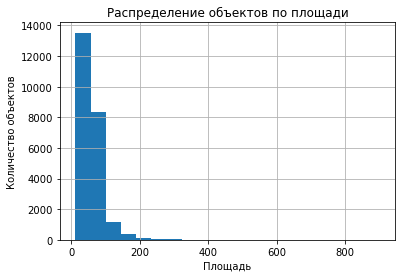

In [45]:
df['total_area'].hist(bins=20) # построим гистограмму по площади
plt.title('Распределение объектов по площади')
plt.xlabel('Площадь')
plt.ylabel('Количество объектов')
plt.show()

Большинство значений укладываются в диапозон до 200 метров, а основные значения - до 69.9 (третий квартиль). Построим еще одну гистограмму, ограничев диапозон значений до 100 метров, чтобы внимательнее изучить, как выглядят "типичные" значения.

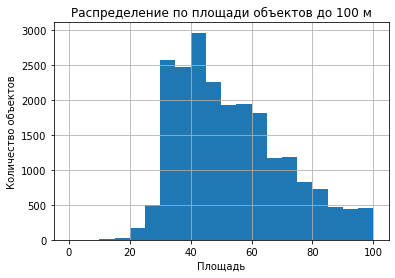

In [46]:
df['total_area'].hist(bins=20, range=(0,100))
plt.title('Распределение по площади объектов до 100 м')
plt.xlabel('Площадь')
plt.ylabel('Количество объектов')
plt.show()

У графика есть несколько пиков. Первый - в районе 30 метров — вероятно, это квартиры-студии. Второй - около 42 метров - типичные "однушки". Очевидно, именно маленькие квартиры являются основным предложением на рынке.

Посмотрим, сколько в датасете недвижимости больше 400 метров (там, где первая гистограмма сливается с осью).

In [47]:
df[df['total_area'] > 400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,floor_category,living_share,kitchen_share
660,3,49950000,483.899994,2017-10-04,7,3.20,6.0,312.5,4,False,...,3.0,22.0,391.0,103224,2017,10,2,другой,0.645795,0.054557
3117,19,140000000,631.000000,2019-03-30,7,NaN,5.0,NaN,5,False,...,2.0,210.0,NaN,221870,2019,3,5,последний,NaN,0.095087
3676,12,28789000,441.980011,2019-01-23,4,NaN,6.0,NaN,6,False,...,0.0,NaN,NaN,65136,2019,1,2,последний,NaN,0.079302
4237,1,50000000,517.000000,2017-10-14,7,NaN,4.0,332.0,3,False,...,2.0,540.0,NaN,96712,2017,10,5,другой,0.642166,0.042553
5358,20,65000000,590.000000,2019-02-14,15,3.50,6.0,409.0,3,False,...,0.0,NaN,14.0,110169,2019,2,3,другой,0.693220,0.169492
5893,3,230000000,500.000000,2017-05-31,6,NaN,7.0,NaN,7,False,...,2.0,198.0,50.0,460000,2017,5,2,последний,NaN,0.080000
6221,8,34000000,470.299988,2018-01-14,4,NaN,3.0,248.7,3,False,...,3.0,122.0,179.0,72294,2018,1,6,последний,0.528811,0.085052
6621,20,99000000,488.000000,2017-04-09,5,2.95,20.0,216.0,17,False,...,1.0,368.0,351.0,202869,2017,4,6,другой,0.442623,0.102459
8018,20,84000000,507.000000,2015-12-17,5,4.45,7.0,301.5,7,True,...,0.0,NaN,1078.0,165680,2015,12,3,последний,0.594675,0.089744
9826,1,43185328,494.100006,2017-05-12,1,2.85,12.0,NaN,3,False,...,0.0,NaN,5.0,87402,2017,5,4,другой,NaN,NaN


Половина таких предложений, очевидно, являются премиальными пентхаусами - эти квартиры расположены на последних этажах, а цена за метр доходит до 1 000 000.

Тут следует выяснить - а какая цена за метр явлется "нормальной".

In [48]:
df['meter_price'].describe().apply("{0:.2f}".format) # к выводу применяется форматирование 
                                                     # для привычного вида показателя "цена за метр"

count      23699.00
mean       99421.66
std        50306.80
min          112.00
25%        76585.50
50%        95000.00
75%       114256.00
max      1907500.00
Name: meter_price, dtype: object

При медианном значении 95 000 за метр, мы имеем объект с ценой 112.

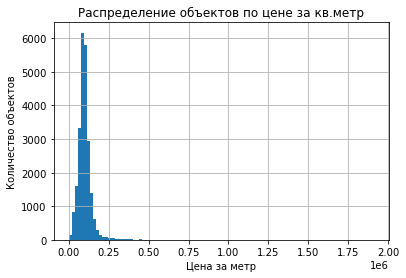

In [49]:
df['meter_price'].hist(bins=100)
plt.title('Распределение объектов по цене за кв.метр')
plt.xlabel('Цена за метр')
plt.ylabel('Количество объектов')
plt.show()

График похож на нормальное распределение, хотя кажется должен начинаться с какой-то минимально разумной цены за метр с поправкой на данные о объектах в селах.

In [50]:
df[df['meter_price'] <15000]['locality_name'].value_counts()

Сланцы                                26
деревня Старополье                     3
поселок городского типа Никольский     3
Луга                                   2
поселок Совхозный                      2
Гатчина                                2
деревня Выскатка                       2
посёлок станции Свирь                  1
поселок Тёсово-4                       1
поселок Оредеж                         1
деревня Вахнова Кара                   1
поселок Житково                        1
деревня Ям-Тесово                      1
деревня Малая Романовка                1
деревня Фалилеево                      1
деревня Сижно                          1
Санкт-Петербург                        1
деревня Бор                            1
Пикалёво                               1
Подпорожье                             1
поселок городского типа Ефимовский     1
городской посёлок Будогощь             1
Бокситогорск                           1
поселок Серебрянский                   1
Name: locality_n

Кажется, поработав пару лет в Санкт-Петербурге, можно стать помещиком в Сланцах - почти вся дешевая недвижимость расположена именно там.

Вероятно, остальные "дешевые метры" приходятся на старые малоэтажные дома.

In [51]:
df[df['meter_price'] <30000]['floors_total'].mean()

4.298283261802575

In [52]:
df['floors_total'].mean()

10.67382374115953

Так и есть — при cреднем количестве этаже более 10, дешевую недвижимостьмо можно найти в малоэтажных домах - такие, как правило, относятся к советской застройке и уже находятся не в лучшем состоянии.

Продолжим анализ по цене, но уже не за метр, а за объект целиком.

In [53]:
df['last_price'].describe().apply("{0:.2f}".format)

count        23699.00
mean       6541548.77
std       10887013.27
min          12190.00
25%        3400000.00
50%        4650000.00
75%        6800000.00
max      763000000.00
Name: last_price, dtype: object

Видно, что в датасете есть объекты с очень высокой и очень низкой ценой, которые дают большое стандартное отклонение.

In [54]:
df[df['last_price'] == 12190] # тот самый "подозрительный дом" за 12190 и ценой за метр 112

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,floor_category,living_share,kitchen_share
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,0.0,NaN,8.0,112,2019,3,2,последний,0.293578,0.37156


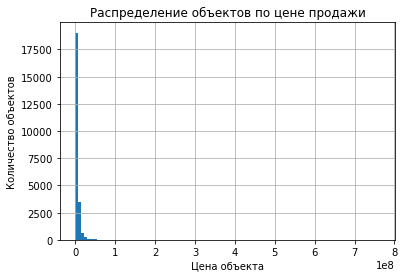

In [55]:
df['last_price'].hist(bins=100)
plt.title('Распределение объектов по цене продажи')
plt.xlabel('Цена объекта')
plt.ylabel('Количество объектов')
plt.show()

Гистограмма по общим данным не наглядна - из-за наличия в выборке "выбросов" с крайне высокой ценой. Построим еще одну гистограмму, где ограничим цену слева разумной минимальной границей, а справа - третим квартилем + 1,5 межквартильного размаха.

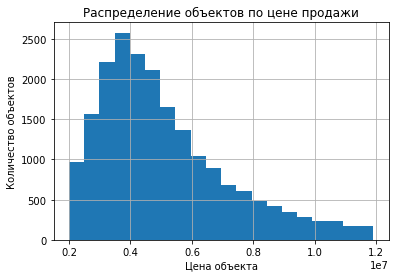

In [56]:
df['last_price'].hist(bins=20, range=(2000000,11900000)) 
plt.title('Распределение объектов по цене продажи')
plt.xlabel('Цена объекта')
plt.ylabel('Количество объектов')
plt.show()

В диапозоне значений, в которые не попадают выбросы, цены похожи на нормальное распределение со средней ценой чуть больше 4 млн.

Перейдем к анализу в разрезе числа комнат.

In [57]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

В датасете примерно одинаковое количество объектов недвижимости с одной и двумя комнатами. Лишь у нескольких их количество превышает 8.

In [58]:
df[df['rooms']>8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,floor_category,living_share,kitchen_share
648,3,17500000,183.699997,2018-07-01,11,3.40,7.0,138.8,7,False,...,0.0,NaN,NaN,95264,2018,7,6,последний,0.755580,0.072401
866,5,25000000,363.000000,2017-12-23,14,3.16,5.0,222.0,4,False,...,2.0,435.0,418.0,68871,2017,12,5,другой,0.611570,0.045730
4149,6,23000000,272.600006,2018-01-11,10,3.14,7.0,145.9,7,False,...,1.0,531.0,NaN,84373,2018,1,3,последний,0.535216,0.068966
5358,20,65000000,590.000000,2019-02-14,15,3.50,6.0,409.0,3,False,...,0.0,NaN,14.0,110169,2019,2,3,другой,0.693220,0.169492
8822,14,49968900,398.000000,2017-07-12,9,3.00,2.0,160.1,1,False,...,2.0,440.0,471.0,125550,2017,7,2,первый,0.402261,0.103015
8860,12,17000000,235.000000,2018-07-14,9,3.00,6.0,NaN,3,False,...,0.0,NaN,90.0,72340,2018,7,5,другой,NaN,NaN
9550,10,23500000,313.000000,2017-02-13,9,3.20,6.0,179.2,5,False,...,0.0,NaN,NaN,75080,2017,2,0,другой,0.572524,0.042173
9688,8,33000000,194.100006,2017-02-07,11,3.43,5.0,129.0,2,False,...,2.0,66.0,813.0,170015,2017,2,1,другой,0.664606,0.061309
13019,0,22250000,249.899994,2019-04-23,9,3.20,5.0,157.0,5,False,...,0.0,NaN,NaN,89036,2019,4,1,последний,0.628251,0.049620
13397,14,19500000,309.700012,2016-02-03,9,NaN,5.0,199.0,5,False,...,0.0,NaN,468.0,62964,2016,2,2,последний,0.642557,0.046174


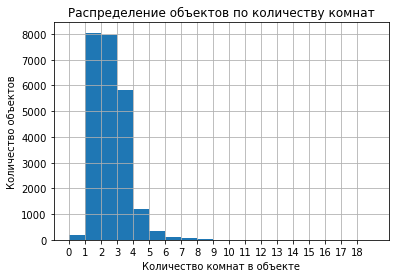

In [59]:
df['rooms'].hist(bins=19) #количество корзин по максимальному значению по кол комнат
plt.xticks(range(19))
plt.title('Распределение объектов по количеству комнат')
plt.xlabel('Количество комнат в объекте')
plt.ylabel('Количество объектов')
plt.show()
plt.show() 

Наконец, рассмотрим высоту потолков.

In [60]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Максимально значение 100 м - кто-то продает башню?

In [61]:
df[df['ceiling_height'] == 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,floor_category,living_share,kitchen_share
22869,0,15000000,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,3.0,30.0,19.0,600000,2018,7,2,последний,0.56,0.44


Продано за 19 дней, вот что значит высокие потолки

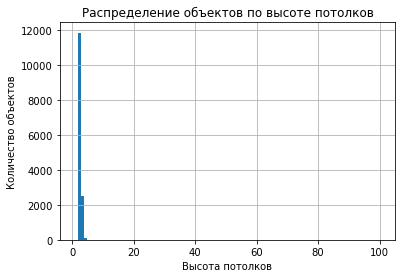

In [62]:
df['ceiling_height'].hist(bins=100) # построим гистограмму для высоты потолков
plt.title('Распределение объектов по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объектов')
plt.show()

Из-за выбросов гистограмма "растянулась" вправо. Ограничим вывод 7 метрами — учитывая, что 75% квартиль 2,8 м сюда должны попасть все "нормальные" объекты.

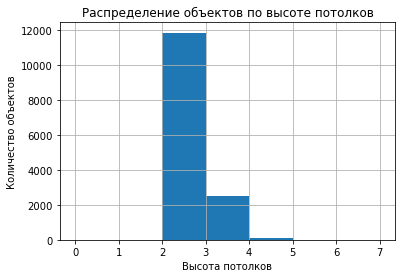

In [63]:
df['ceiling_height'].hist(bins=7, range=(0,7))
plt.title('Распределение объектов по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объектов')
plt.show()

Кажется, все дома с высотой потолков больше 6 метров надо отбросить.

In [64]:
df[df['ceiling_height'] > 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,floor_category,living_share,kitchen_share
355,17,3600000,55.200001,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,NaN,259.0,65217,2018,7,3,другой,0.579710,NaN
3148,14,2900000,75.000000,2018-11-12,3,32.0,3.0,53.0,2,False,...,NaN,NaN,NaN,38667,2018,11,0,другой,0.706667,0.106667
3474,3,1400000,30.000000,2018-03-16,1,8.0,5.0,15.3,2,False,...,NaN,NaN,125.0,46667,2018,3,4,другой,0.510000,0.243333
4643,0,4300000,45.000000,2018-02-01,2,25.0,9.0,30.0,2,False,...,1.0,331.0,181.0,95556,2018,2,3,другой,0.666667,0.155556
4876,7,3000000,25.000000,2017-09-27,0,27.0,25.0,17.0,17,False,...,NaN,NaN,28.0,120000,2017,9,2,другой,0.680000,NaN
5076,0,3850000,30.500000,2018-10-03,1,24.0,5.0,19.5,1,True,...,1.0,578.0,7.0,126230,2018,10,2,первый,0.639344,0.180328
5246,0,2500000,54.000000,2017-10-13,2,27.0,5.0,30.0,3,False,...,NaN,NaN,540.0,46296,2017,10,4,другой,0.555556,0.166667
5669,4,4400000,50.000000,2017-08-08,2,26.0,9.0,21.3,3,False,...,0.0,NaN,267.0,88000,2017,8,1,другой,0.426000,0.140000
5807,17,8150000,80.000000,2019-01-09,2,27.0,36.0,41.0,13,False,...,3.0,80.0,38.0,101875,2019,1,2,другой,0.512500,0.150000
5863,20,5650000,45.000000,2018-08-15,1,8.3,16.0,19.3,14,False,...,1.0,613.0,14.0,125556,2018,8,2,другой,0.428889,0.184444


In [65]:
df[df['ceiling_height'] > 6]['meter_price'].median()

88000.0

Интересно, что потолки больше 8 метров не приводят к росту цены за метр. Медианное значение даже ниже общего по выборке - 95,000.00 за метр.

### Удаление аномальных значений

После анализа, избавимся от выбивающихся значений:

In [66]:
# оставляем значения с потолками ниже 6 метров и выше 2,5 м — это норма высоты по САНПИН в жилом помещении.
# или пропусками

df = df[((df['ceiling_height']<6)&(df['ceiling_height']>2.5))|(df['ceiling_height'].isna())]

In [67]:
df = df[df['last_price'] > 2000000] # отбросим значения с подозрительно низкой ценой, а с высокой оставим:
                                    # вероятно, это квартиры в центре, которые будут интересовать нас позднее

In [68]:
df = df[df['total_area'] < 400]     # и избавляемся от "выбросов" по площажи объекта

In [69]:
df.info() #информация по датафрейму после удаления выбивающихся значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19005 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19005 non-null  int64         
 1   last_price            19005 non-null  int32         
 2   total_area            19005 non-null  float32       
 3   first_day_exposition  19005 non-null  datetime64[ns]
 4   rooms                 19005 non-null  int64         
 5   ceiling_height        10523 non-null  float64       
 6   floors_total          18921 non-null  float64       
 7   living_area           17490 non-null  float64       
 8   floor                 19005 non-null  int64         
 9   is_apartment          19005 non-null  bool          
 10  studio                19005 non-null  bool          
 11  open_plan             19005 non-null  bool          
 12  kitchen_area          17161 non-null  float64       
 13  balcony         

Мы отбросили 4694 записей (23699-19005) — или 19%. Однако, без аномальных значений, анализ и вывод должны стать более релевантными.

### Анализ времени продажи объекта недвижимости

Данные о времени продажи объекта содержатся в столбце `days_exposition`

In [70]:
df['days_exposition'].describe()

count    16640.000000
mean       184.478846
std        223.327510
min          2.000000
25%         45.000000
50%         97.000000
75%        237.000000
max       1572.000000
Name: days_exposition, dtype: float64

Большинству объектов хватило трех месяцев, чтобы быть продаными, однако, 25% продавались более 232 дней или 7,5 месяцев.
Заметим, что среднее сильно отличается от медианы.

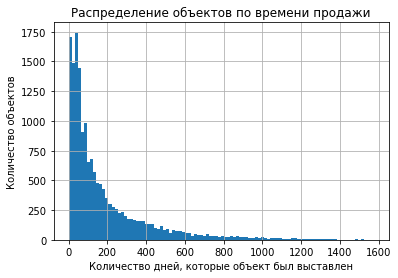

In [71]:
df['days_exposition'].hist(bins=100)
plt.title('Распределение объектов по времени продажи')
plt.xlabel('Количество дней, которые объект был выставлен')
plt.ylabel('Количество объектов')
plt.show()


In [72]:
df[df['days_exposition']<30] # количество объектов реализованное за месяц

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,floor_category,living_share,kitchen_share
11,9,3300000,44.000000,2018-08-27,2,NaN,5.0,31.0,4,False,...,0.0,NaN,7.0,75000,2018,8,0,другой,0.704545,0.136364
15,16,4650000,39.000000,2017-11-18,1,NaN,14.0,20.5,5,False,...,1.0,296.0,19.0,119231,2017,11,5,другой,0.525641,0.194872
34,3,3290000,33.000000,2018-02-04,1,2.55,16.0,14.0,3,False,...,0.0,NaN,15.0,99697,2018,2,6,другой,0.424242,0.242424
39,15,5200000,54.400002,2018-11-29,2,2.75,9.0,29.7,2,False,...,1.0,1175.0,29.0,95588,2018,11,3,другой,0.545956,0.161765
53,7,4300000,39.099998,2017-11-10,1,NaN,25.0,15.4,13,False,...,0.0,NaN,6.0,109974,2017,11,4,другой,0.393862,0.396419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23661,19,8100000,75.400002,2018-09-19,3,2.75,12.0,47.9,11,False,...,0.0,NaN,6.0,107427,2018,9,2,другой,0.635279,0.124668
23677,8,2450000,35.000000,2018-10-26,1,2.60,5.0,18.0,4,False,...,NaN,NaN,28.0,70000,2018,10,4,другой,0.514286,0.274286
23688,19,9200000,101.000000,2019-04-01,3,3.05,15.0,63.0,12,False,...,0.0,NaN,23.0,91089,2019,4,0,другой,0.623762,0.148515
23689,13,3550000,35.299999,2018-02-28,1,2.86,15.0,16.3,4,False,...,2.0,652.0,29.0,100567,2018,2,2,другой,0.461756,0.257790


Некоторые объекты улетают как горячие пирожки. Посмотрим диаграмму размаха.

<AxesSubplot:>

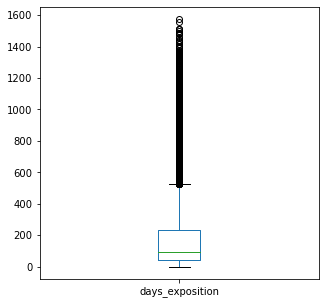

In [73]:
df['days_exposition'].plot(kind='box', figsize=(5,5))

«Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 IQR. В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками.

Таким образом, нормальные значения простираются в диапозоне от 0 дней до 514 дней. Сравним общий датасет и выборку с низколиквидными объектами.

In [74]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,living_share,kitchen_share
count,19005.000000,1.900500e+04,19005.000000,19005.000000,10523.000000,18921.000000,17490.000000,19005.000000,17161.000000,19005.000000,...,6958.000000,15518.000000,8029.000000,16640.000000,1.900500e+04,19005.000000,19005.000000,19005.000000,17490.000000,17161.000000
mean,9.944225,7.097928e+06,63.011196,2.097659,2.805337,11.539189,35.579028,6.323073,11.291323,0.608314,...,493.227364,0.808609,512.811184,184.478846,1.053378e+05,2017.306025,6.426888,2.572481,0.555466,0.192705
std,5.739224,8.926209e+06,34.629467,1.105866,0.280604,6.827066,22.255738,5.136530,6.061362,0.983453,...,354.642305,0.959097,277.284566,223.327510,4.912579e+04,1.048100,3.486780,1.782321,0.106506,0.075488
min,0.000000,2.006000e+06,12.000000,0.000000,2.510000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,2.000000,1.586200e+04,2014.000000,1.000000,0.000000,0.021583,0.025381
25%,6.000000,3.700000e+06,41.000000,1.000000,2.600000,5.000000,19.000000,3.000000,8.000000,0.000000,...,284.000000,0.000000,287.000000,45.000000,8.139500e+04,2017.000000,3.000000,1.000000,0.482358,0.136364
50%,10.000000,5.000000e+06,55.000000,2.000000,2.700000,9.000000,31.000000,5.000000,10.000000,0.000000,...,449.000000,1.000000,495.000000,97.000000,9.816000e+04,2017.000000,6.000000,3.000000,0.558793,0.177632
75%,14.000000,7.500000e+06,73.980003,3.000000,2.920000,16.000000,43.800000,9.000000,12.500000,1.000000,...,612.000000,1.000000,722.000000,237.000000,1.180560e+05,2018.000000,10.000000,4.000000,0.629091,0.241692
max,50.000000,3.300000e+08,399.000000,19.000000,5.800000,60.000000,264.500000,33.000000,107.000000,5.000000,...,3190.000000,3.000000,1344.000000,1572.000000,1.736842e+06,2019.000000,12.000000,6.000000,1.000000,0.787879


In [75]:
df[df['days_exposition']>514].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,living_share,kitchen_share
count,1400.000000,1.400000e+03,1400.000000,1400.000000,855.000000,1394.000000,1316.000000,1400.000000,1294.000000,1400.000000,...,594.000000,1186.000000,692.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1316.000000,1294.000000
mean,8.939286,9.116213e+06,74.188698,2.375000,2.871637,10.829986,42.137842,5.965000,12.520185,0.520714,...,506.195286,0.983137,465.683526,774.092857,110714.362143,2015.617857,6.466429,2.507143,0.559298,0.186822
std,5.545693,1.256107e+07,44.542458,1.292781,0.334156,6.607046,28.301182,4.970915,7.184453,0.910348,...,396.039481,1.043227,277.491867,224.513863,56186.873615,0.859107,3.576032,1.706467,0.105102,0.079248
min,0.000000,2.050000e+06,18.000000,0.000000,2.510000,2.000000,10.000000,1.000000,4.500000,0.000000,...,11.000000,0.000000,19.000000,515.000000,25573.000000,2014.000000,1.000000,0.000000,0.174419,0.043576
25%,5.000000,4.100000e+06,44.000000,1.000000,2.645000,5.000000,20.000000,2.000000,8.400000,0.000000,...,282.250000,0.000000,240.000000,590.750000,81087.000000,2015.000000,3.000000,1.000000,0.488896,0.129923
50%,8.000000,5.899950e+06,62.299999,2.000000,2.750000,9.000000,35.575000,4.000000,10.665000,0.000000,...,441.000000,1.000000,437.000000,711.000000,98716.000000,2016.000000,6.000000,2.000000,0.561241,0.169000
75%,13.000000,9.738750e+06,89.525000,3.000000,3.000000,16.000000,52.000000,8.000000,14.152500,1.000000,...,622.500000,2.000000,656.250000,900.250000,124440.250000,2016.000000,10.000000,4.000000,0.632461,0.234807
max,24.000000,1.908700e+08,399.000000,16.000000,5.600000,35.000000,260.000000,25.000000,77.000000,5.000000,...,2467.000000,3.000000,1341.000000,1572.000000,719298.000000,2017.000000,12.000000,6.000000,0.975754,0.675411


Можно заметить: у объектов, которые продавались долго **выше средняя и медианная цена**. Остальные параметры не различаются сильно.

### Факторы, влияющие на цену недвижимости

Посмотрим на влияние на цену недвижимоти её площади, числа комнат, удаленности от центра. Для этого создадим вспомогательную таблицу, в которую поместим срез по необходимым показателям.

In [76]:
df_price_by_area_rooms_center = df[['last_price','total_area','rooms','city_centers_nearest']]

In [77]:
df_price_by_area_rooms_center.corr() 

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.683734,0.411686,-0.257341
total_area,0.683734,1.000000,0.792294,-0.243432
rooms,0.411686,0.792294,1.000000,-0.201261
city_centers_nearest,-0.257341,-0.243432,-0.201261,1.000000


Чем больше площадь, тем больше цена - очевидно и факт. Между показателями прямая связь.

Количество комнат также влияет на цену недвижимости, но не так сильно, как площадь - ведь бывают и большие однушки, и крошечные трешки.

И еще один очевидный вывод: чем дальше от центра, тем дешевле квартира - правда цена падает не слишком быстро - метры все-таки на первом месте.

После интерпретации коэффициентов корреляции, можно визуализировать данные параметры на графиках, которые покажут парную зависимость между ними.

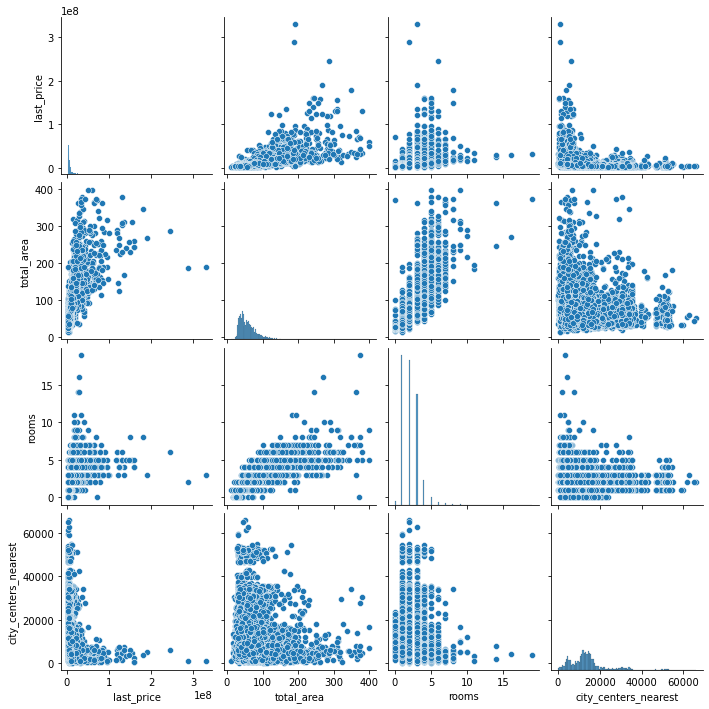

In [78]:
sns.pairplot(df_price_by_area_rooms_center)

In [79]:
#создаем сводную таблицу для оценки влияния этажа на цену
df_price_by_floor = df.pivot_table(index='floor_category', values='last_price', aggfunc=['median'])

In [80]:
df_price_by_floor

,median
,last_price
floor_category,
другой,5150000
первый,4300000
последний,5000000


Квартиры на первом этаже продавались в среднем на 15% дешевле остальных. Неожиданно, но квартиры на последнем этаже стоят на 6% дешевле остальных - кажется, людей либо пугает возможность текущей кровли, либо они хотят общаться с соседями сверху.

Теперь посмотрим на влияние на цены **года** объявления.

In [81]:
df.pivot_table(index='year', values='last_price', aggfunc=['median'])

,median
,last_price
year,
2014,8681628
2015,5695205
2016,4850000
2017,4800000
2018,5000000
2019,5600000


В 2014 году цены оказались неожиданно высокими - возможно, сказалась "Крымская весна" и желание населения защитить деньги от инфляции инвестировав их в недвижимость. Возможно, резкий рост курса доллара по той же причине и привязка договоров к иностранной валюте привел к такому росту. А может быть, просто после 2015 года увеличилось количество вводимого жилья - в датасете нет данных за начало "десятых", чтобы просмотреть долгосрочный тренд.

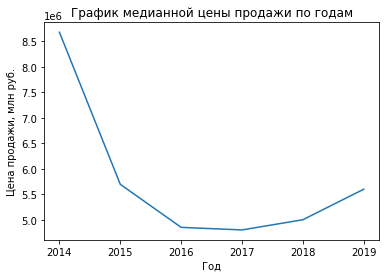

In [82]:
df.pivot_table(index='year', values='last_price', aggfunc=['median']).plot(legend=None)
plt.title('График медианной цены продажи по годам')
plt.xlabel('Год')
plt.ylabel('Цена продажи, млн руб.')
plt.show()

На графике видно, что после 2017 года цены пошли вверх - снижение ключевой ставки и льготная ипотека начали разгонять спрос.

In [83]:
df.pivot_table(index='month', values='last_price', aggfunc=['median']) # группируем по месяцу размещения

,median
,last_price
month,
1,5080000
2,5045000
3,5099000
4,5200000
5,4800000
6,4800000
7,5050000
8,5050000


Не совсем очевидный момент - в начале лета цены на недвижимость падают. Люди думают об отпуске, а не о покупке квартиры.

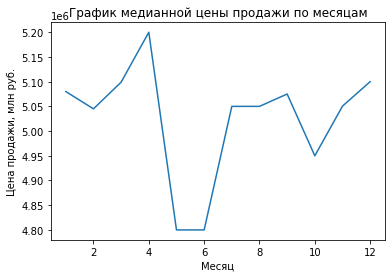

In [84]:
df.pivot_table(index='month', values='last_price', aggfunc=['median']).plot(legend=None)
plt.title('График медианной цены продажи по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Цена продажи, млн руб.')
plt.show()

На графике отлично видно, как цены опускаются к началу лета.

In [85]:
df.pivot_table(index='weekday', values='last_price', aggfunc=['median'])

,median
,last_price
weekday,
0,5044999
1,5100000
2,5100000
3,5100000
4,4950000
5,4900000
6,4900000


Еще одна неочевидная закономерность - в конце недели люди выставляют недвижимость по более низкой цене. Возможно, лучший день для покупки — воскресенье июня?

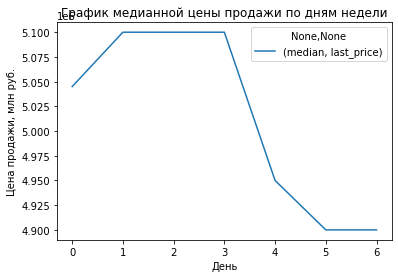

In [86]:
df.pivot_table(index='weekday', values='last_price', aggfunc=['median']).plot()
plt.title('График медианной цены продажи по дням недели')
plt.xlabel('День')
plt.ylabel('Цена продажи, млн руб.')
plt.show()

In [87]:
df[(df['weekday']==6)&(df['month']==6)]['last_price'].median() # медианная цена объектов, проданных в июньские субботы

4500000.0

In [88]:
df['last_price'].median()                                      # медианная цена по всему датасету

5000000.0

Так и есть — можно сэкономить  500,000 рублей!

### Цены на недвижимость в населенных пунктах с наибольшим количеством объявлений

Посмотрим, в каких населенных пунктах наибольшее количество объявлений.

In [89]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      13527
посёлок Мурино         497
посёлок Шушары         407
Всеволожск             345
посёлок Парголово      309
деревня Кудрово        297
Пушкин                 289
Колпино                234
Гатчина                221
Кудрово                169
Name: locality_name, dtype: int64

In [90]:
#создаем дополнительный датасет по объявлениям из 10 населенных пунктов с наибольшим количеством объявлений
df_top10 = df[df['locality_name'].isin(df['locality_name'].value_counts().head(10).index)]

In [91]:
df_top10.pivot_table(index=['locality_name'], values=['last_price','meter_price'], aggfunc=['count','min','max','mean']).sort_values(by=('count','meter_price'), ascending=False)

count                    min                    max  \
                  last_price meter_price last_price meter_price last_price   
locality_name                                                                
Санкт-Петербург        13527       13527    2050000       15862  330000000   
посёлок Мурино           497         497    2050000       50000    8500000   
посёлок Шушары           407         407    2080000       47700   10990000   
Всеволожск               345         345    2050000       38226   24412900   
посёлок Парголово        309         309    2050000       39206    9140000   
деревня Кудрово          297         297    2100000       54160   13000000   
Пушкин                   289         289    2200000       59836   42000000   
Колпино                  234         234    2100000       47957   36900000   
Гатчина                  221         221    2050000       45882   13900000   
Кудрово                  169         169    2350000       68519   12800000   

                                       mean                 
                  meter_price    last_price    meter_price  
locality_name                                               
Санкт-Петербург       1736842  8.304724e+06  116732.307237  
посёлок Мурино         138580  3.725017e+06   85951.945674  
посёлок Шушары         147826  4.178494e+06   78752.058968  
Всеволожск             640422  3.972951e+06   70017.901449  
посёлок Парголово      138522  4.529202e+06   90424.093851  
деревня Кудрово        142857  4.236240e+06   92463.659933  
Пушкин                 256522  6.989620e+06  105140.678201  
Колпино                125000  4.107010e+06   75354.811966  
Гатчина                146316  3.731762e+06   70717.760181  
Кудрово                160401  4.574778e+06  100098.479290

Как и ожидалось, средняя цена за метр наиболее высокая в Санкт-Петербурге, а в пригородах - цена ниже. 

Особенно заметная разница цены на наиболее дорогую недвижимость.

### Цены на недвижимость в центре культурной столицы

Т. к. цены на недвижимость в центре Санкт-Петербурга сильно выше остальных, выделим этот регион в отдельный датасет.

In [92]:
df_spb = df[df['locality_name']=='Санкт-Петербург']

In [93]:
df_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13527 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          13527 non-null  int64         
 1   last_price            13527 non-null  int32         
 2   total_area            13527 non-null  float32       
 3   first_day_exposition  13527 non-null  datetime64[ns]
 4   rooms                 13527 non-null  int64         
 5   ceiling_height        7926 non-null   float64       
 6   floors_total          13458 non-null  float64       
 7   living_area           12491 non-null  float64       
 8   floor                 13527 non-null  int64         
 9   is_apartment          13527 non-null  bool          
 10  studio                13527 non-null  bool          
 11  open_plan             13527 non-null  bool          
 12  kitchen_area          12268 non-null  float64       
 13  balcony         

В выборке оказалось более половины от исходного датасета. Добавим в него столбец, в котором укажем расстояние до центра в киллометрах, округлив его до целых значений.

In [94]:
df_spb['center_km'] = (df_spb['city_centers_nearest'] / 1000).round()

<ipython-input-94-9a5ea54809c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['center_km'] = (df_spb['city_centers_nearest'] / 1000).round()


In [95]:
# дополнительная сводная таблица для анализа по удаленности от центра
df_spb_price_by_km = df_spb.pivot_table(index='center_km',values='last_price', aggfunc=['mean','median'])

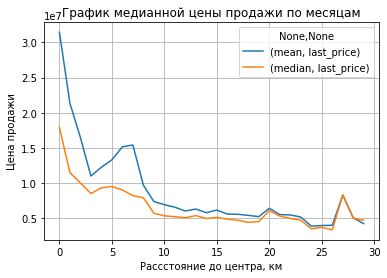

In [96]:
df_spb_price_by_km.plot(grid=True)
plt.title('График медианной цены продажи по месяцам')
plt.xlabel('Рассстояние до центра, км')
plt.ylabel('Цена продажи')
plt.show()

График преломляется где-то в районе 1 км, а затем резко меняет свой рисунок в раойне 3 км от цента. Соответственно - в пределах первого км расположены наиболее дорогие квартиры (судя по большой разнице между медианой и среднем на этом участке, некоторые из них ОЧЕНЬ дорогие). В районе 3 км цена начинает идти в рост - скорее всего на этом участке появляются новостройки, которые невозможно ставить в центре, находящемся под защитой ЮНЕСКО.

Рост заканчивается где то в районе 7 км - соответственно, ограничим зону анализа этим расстоянием.

Выделим квартиры в центре в отдельный сегмент.

In [97]:
df_spb_center = df_spb[df_spb['center_km'] <= 7]

In [98]:
df_spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,living_share,kitchen_share,center_km
count,3390.000000,3.390000e+03,3390.000000,3390.000000,2160.000000,3383.000000,3107.000000,3390.000000,3066.000000,3390.000000,...,3390.000000,2459.000000,2826.000000,3.390000e+03,3390.000000,3390.000000,3390.000000,3107.000000,3066.000000,3390.000000
mean,10.188791,1.428202e+07,91.959396,2.837758,3.120944,7.090452,54.136453,4.188496,14.533969,0.320649,...,1.302655,465.371696,250.910474,1.446283e+05,2017.155162,6.428024,2.514454,0.581666,0.173598,4.471681
std,6.021138,1.791850e+07,51.059692,1.420747,0.357683,3.858003,34.070117,2.935550,8.897276,0.760188,...,1.094458,271.417351,275.152206,8.783446e+04,1.127251,3.448647,1.713880,0.115891,0.083393,1.684356
min,0.000000,2.100000e+06,12.000000,0.000000,2.510000,2.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,22.000000,3.000000,1.586200e+04,2014.000000,1.000000,0.000000,0.021583,0.025381,0.000000
25%,6.000000,6.750000e+06,58.000000,2.000000,2.900000,5.000000,31.900000,2.000000,9.100000,0.000000,...,0.000000,227.000000,60.000000,9.978525e+04,2017.000000,3.000000,1.000000,0.514035,0.116513,3.000000
50%,10.000000,9.300000e+06,79.695000,3.000000,3.000000,6.000000,46.640000,4.000000,12.000000,0.000000,...,1.000000,458.000000,144.000000,1.238315e+05,2017.000000,6.000000,3.000000,0.595745,0.152329,5.000000
75%,15.000000,1.450000e+07,110.000000,3.000000,3.300000,8.000000,67.000000,5.000000,17.000000,0.000000,...,2.000000,666.000000,351.000000,1.559592e+05,2018.000000,10.000000,4.000000,0.663337,0.206630,6.000000
max,50.000000,3.300000e+08,399.000000,19.000000,5.800000,25.000000,264.500000,25.000000,107.000000,5.000000,...,3.000000,1293.000000,1572.000000,1.736842e+06,2019.000000,12.000000,6.000000,0.983447,0.636986,7.000000


Средняя цена квартиры в центре Петербурга 14,282,020.00, в то время как по общей выборке - 6,708,449.00 — в 2,1 раза выше. 

Площадь квартиры тоже значительно больше, чем в среднем, - медианное значение 79.6 м (в общей выборке 53). 

Кроме того, у квартир в центре обычно 3 комнаты, а не две, как в общей выборке. Высота потолков тоже выше - медианное значение 3 против 2,65 по всем объектам.

Таким образом, квартиры в центре в целом просторнее. Выясним, зависит ли цена на них от площади и количества комнат, или покупатели платят исключительно за локацию.


In [99]:
#создадим срез по необходимым столбцам для подсчета корреляции
df_spb_center_price_by= df_spb_center[['last_price','total_area','rooms','city_centers_nearest']]

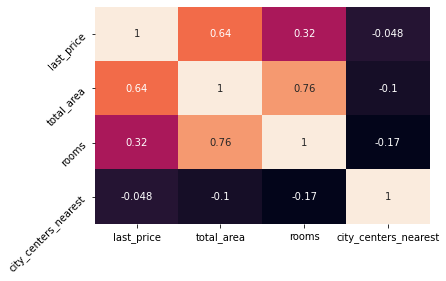

In [100]:
sns.heatmap(df_spb_center_price_by.corr(), annot = True, cbar=False)
plt.yticks(rotation = 45)
plt.show()

Влияние площади квартиры и количества комнат на цену уже значительно ниже - коэффициенты корреляции 0,56 и 0,23 против 0,68 и 0,39 соответственно. Таким образом, в цене прежде всего местоположение и возможность гулять по историческим улицам.

In [101]:
#посмотрим на цены по годам
df_spb_center.pivot_table(index='year',values='last_price',aggfunc='median')

,last_price
year,
2014,19800000
2015,10500000
2016,9500000
2017,9000000
2018,9000000
2019,9500000


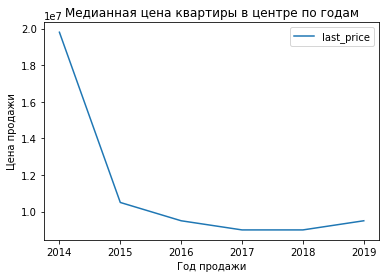

In [102]:
df_spb_center.pivot_table(index='year',values='last_price',aggfunc='median').plot()
plt.title('Медианная цена квартиры в центре по годам')
plt.xlabel('Год продажи')
plt.ylabel('Цена продажи')
plt.show()

Динамика цен схожая с общей выборкой, но разницы цен в 2014 году и последующих еще существеннее.

In [103]:
df_spb_center.pivot_table(index='month', values='last_price', aggfunc=['median'])

,median
,last_price
month,
1,10150000
2,9520000
3,9500000
4,9175000
5,8850000
6,8995000
7,9200000
8,9200000


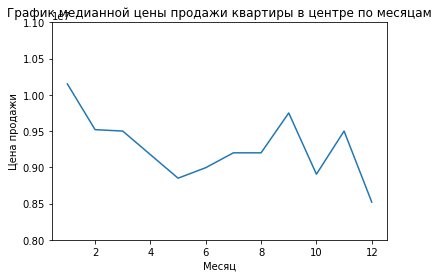

In [104]:
df_spb_center.pivot_table(index='month', values='last_price', aggfunc=['median']).plot(legend=None)
plt.ylim([8000000,11000000])
plt.title('График медианной цены продажи квартиры в центре по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Цена продажи')
plt.show()

А вот по месяцам в динамике цен есть различие - квартиры в центре выгоднее приобретать к концу года. Вероятно, в декабре часть инвесторов фиксирует прибыль и выставляет квратиры купленные для сдачи на продажу.

## Общий вывод

В ходе исследования мы проанализировали архив объявлений сервиса "Яндекс.Недвижимость" по Санкт-Петербургу и ближайшим населенным пунктам.

На первом этапе исследования данные были проверены на наличие дубликатов, были заполнены пропуски в столбцах там, где это было возможно. Кроме того, для удобства дальнейшей обработки были изменены типы данных в некоторых столбцах.

После этого в датасет были добавлены некоторые необходимые метрики, на основании которых обычно анализируют предложения недвижимости - прежде всего цена за квадратный метр.

Для дальнейшей обработки из данных были удалены крайние и аномальные значения — например, объекты не соответсвующие нормам САНПИН. 

После предобработки данных, удаления аномалий и добавления необходимых метрик, были произведена оценка влияния различных факторов на цену недвижимости.

Было установлено, что на стоимость объекта одновременно влияет множество факторов. Наибольшее влияние оказывает площадь объекта, а также его местоположение - по цене квартиры в центре можно взять сразу несколько квартир в пригородах.

Можно предположить, что нормальная цена за квадратный метр недвижимости в Санкт-Петербурге составляет 116.000 рублей, а в центре  - 144 000. Соответсвтенно, объявления, где цена сильно отклоняется от данных значений, требуют дополнительной проверки и модерации.

Из неочевидного - на цену недвижимости влияет день недели и месяц, когда опубликовано объявление.